In [1]:
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import norm
random.seed(41)

In [3]:
#dt = 0.1
#delta = 0.9
#scale = delta**2*dt
def single_particle(t):
    positions=[]
    x=0
    for i in range(t+1):
        positions.append(x)
        x+=random.choice((-1,1))
        
    #positions = [norm.rvs(scale=scale) for i in range(t)]
    return np.array(positions)

In [4]:
# simulate 5 particles for 10 movements
#random.seed(42)
n_gen = 10
n_particles = 5
sim = []
for particle in range(n_particles):
    sim.append(single_particle(n_gen))
sim = np.array(sim)

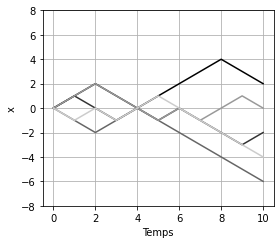

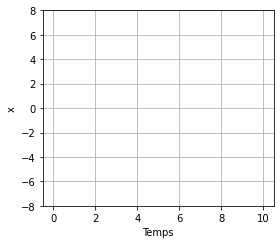

In [5]:
fig, ax = plt.subplots(figsize=[4,3.5])
for i in range(n_particles):
    ax.plot(range(n_gen+1), sim[i], color=f'{i/n_particles}')
ax.set_xlabel('Temps')
ax.set_ylabel('x')
ax.set_ylim(-8,8)
plt.grid()
plt.tight_layout()

#plt.savefig('/Users/mathieu/mhenault_landrylab/BIO-2007/random_walk_trajectories_small.png', dpi=300)
plt.show()
plt.close()

fig, ax_empty = plt.subplots(figsize=[4,3.5])
ax_empty.set_xlabel('Temps')
ax_empty.set_ylabel('x')

ax_empty.set_xlim(ax.get_xlim())
ax_empty.set_ylim(ax.get_ylim())
plt.grid()
plt.tight_layout()
#plt.savefig('/Users/mathieu/mhenault_landrylab/BIO-2007/random_walk_trajectories_small_empty.png', dpi=300)
plt.show()
plt.close()

In [6]:
# simulate 100 particles for 500 movements
random.seed(42)
n_gen = 100
n_particles = 10
sim = []
for particle in range(n_particles):
    sim.append(single_particle(n_gen))
sim = np.array(sim)

In [ ]:
time_values = np.arange(0, n_gen+1, 25)

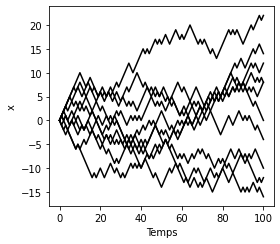

In [7]:
fig, ax = plt.subplots(figsize=[4,3.5])
for i in range(n_particles):
    ax.plot(range(n_gen+1), sim[i], color='black')
ax.set_xlabel('Temps')
ax.set_ylabel('x')

plt.tight_layout()

#plt.savefig('/Users/mathieu/mhenault_landrylab/BIO-2007/random_walk_trajectories.png', dpi=300)
plt.show()
plt.close()

In [ ]:
fig, ax = plt.subplots(figsize=[5,5])

ax.plot(range(n_gen+1), sim.mean(axis=0), color='0.8', zorder=0)
ax.scatter(time_values, sim[:,time_values].mean(axis=0), 
           marker='^', s=70, color='black', zorder=2, label=r'$\overline{x}$')

ax.plot(range(n_gen+1), (sim**2).mean(axis=0), color='0.8', zorder=0)
ax.scatter(time_values, (sim**2)[:,time_values].mean(axis=0), 
           marker='s', s=70, color='0.6', zorder=1, label=r'$\overline{x^2}$')

ax.set_xticks(time_values)
ax.set_xlabel('Temps')
plt.legend()
plt.tight_layout()
plt.grid()

plt.savefig('/Users/mathieu/mhenault_landrylab/BIO-2007/random_walk_x_xsquared.png', dpi=300)
plt.show()
plt.close()

fig, ax_empty = plt.subplots(figsize=[5,5])
ax_empty.set_xlabel('Temps')

ax_empty.set_xlim(ax.get_xlim())
ax_empty.set_ylim(ax.get_ylim())
plt.grid()
plt.tight_layout()
plt.savefig('/Users/mathieu/mhenault_landrylab/BIO-2007/random_walk_x_xsquared_empty.png', dpi=300)
plt.show()
plt.close()

In [ ]:
time_slices_export = pd.DataFrame(sim[:, time_values], columns=time_values, index=range(1,11)).T
time_slices_export[11] = time_slices_export.mean(axis=1)
time_slices_export[12] = time_slices_export.loc[:,range(1,11)].apply(lambda x: np.mean(x**2), axis=1)
#time_slices_export.to_csv('/Users/mathieu/mhenault_landrylab/BIO-2007/time_slices_export.csv', sep='\t')

In [ ]:
# histograms

fig, axes = plt.subplots(ncols=3, figsize=[8,3], gridspec_kw={'left':0.05, 'right':0.98, 'bottom':0.2})
bins = np.arange(-28,28.1,8)
for i, idx in zip([0,50,100], range(3)):
    ax = axes[idx]
    ax.grid()
    ax.hist(time_slices_export.loc[i,range(1,11)],
            bins=bins, label=i, color='black')
    ax.set_xticks(bins)
    ax.set_xticklabels([f'{i:.0f}' for i in bins], rotation=90)
    ax.set_xlabel('Position $x$')
    ax.set_ylim(0,11)
    ax.set_yticks(range(0,11,2))
    ax.set_title(f'Temps {i}')
    sns.despine(trim=True)
    

plt.savefig('/Users/mathieu/mhenault_landrylab/BIO-2007/random_walk_hist.png', dpi=300)
plt.show()
plt.close()


fig, axes = plt.subplots(ncols=3, figsize=[8,3], gridspec_kw={'left':0.05, 'right':0.98, 'bottom':0.2})

for i, idx in zip([0,50,100], range(3)):
    ax = axes[idx]
    ax.grid()
    ax.set_xticks(bins)
    ax.set_xticklabels([f'{i:.0f}' for i in bins], rotation=90)
    ax.set_xlabel('Position $x$')
    ax.set_ylim(0,11)
    ax.set_yticks(range(0,11,2))
    ax.set_title(f'Temps {i}')
    sns.despine(trim=True)
    

plt.savefig('/Users/mathieu/mhenault_landrylab/BIO-2007/random_walk_hist_empty.png', dpi=300)
plt.show()
plt.close()